# YOUTUBE API TUTORIAL 

 Youtube API is nice API that grants you possibilities
 to get much data from YouTube. Comments, videos that are given
 as answer for your search request, list of uploaded videos 
 by certain user, replies for comments, etc.
 This is the official API, so it projected by professionals
 so works good. However, it is limited in using it for free:
 you are given 10 000 points daily to go - your quota. 
 Every API action, every server response reqiure some points cost. 


GETTING STARTED
--------------

 STEP 1: Logging in to Google Developers Console
 -------------
 https://console.cloud.google.com/apis/dashboard
 
 You must log in here using your Google Account. If you don't have one,
 you must register it to start.

 STEP 2: Create a new project
 -------------
 Once you logged, you'll be taken to an empty dashboard.
 Click to the button 'CREATE PROJECT' in upper right-hand 
 corner.
 You’ll be taken to a screen where you can add a project name, 
 select your organization, and select a location (URL). 
 You can create a project without an organization. If you don’t
 have an organization, you won’t be prompted to select a location.

 After this done you'll see this:

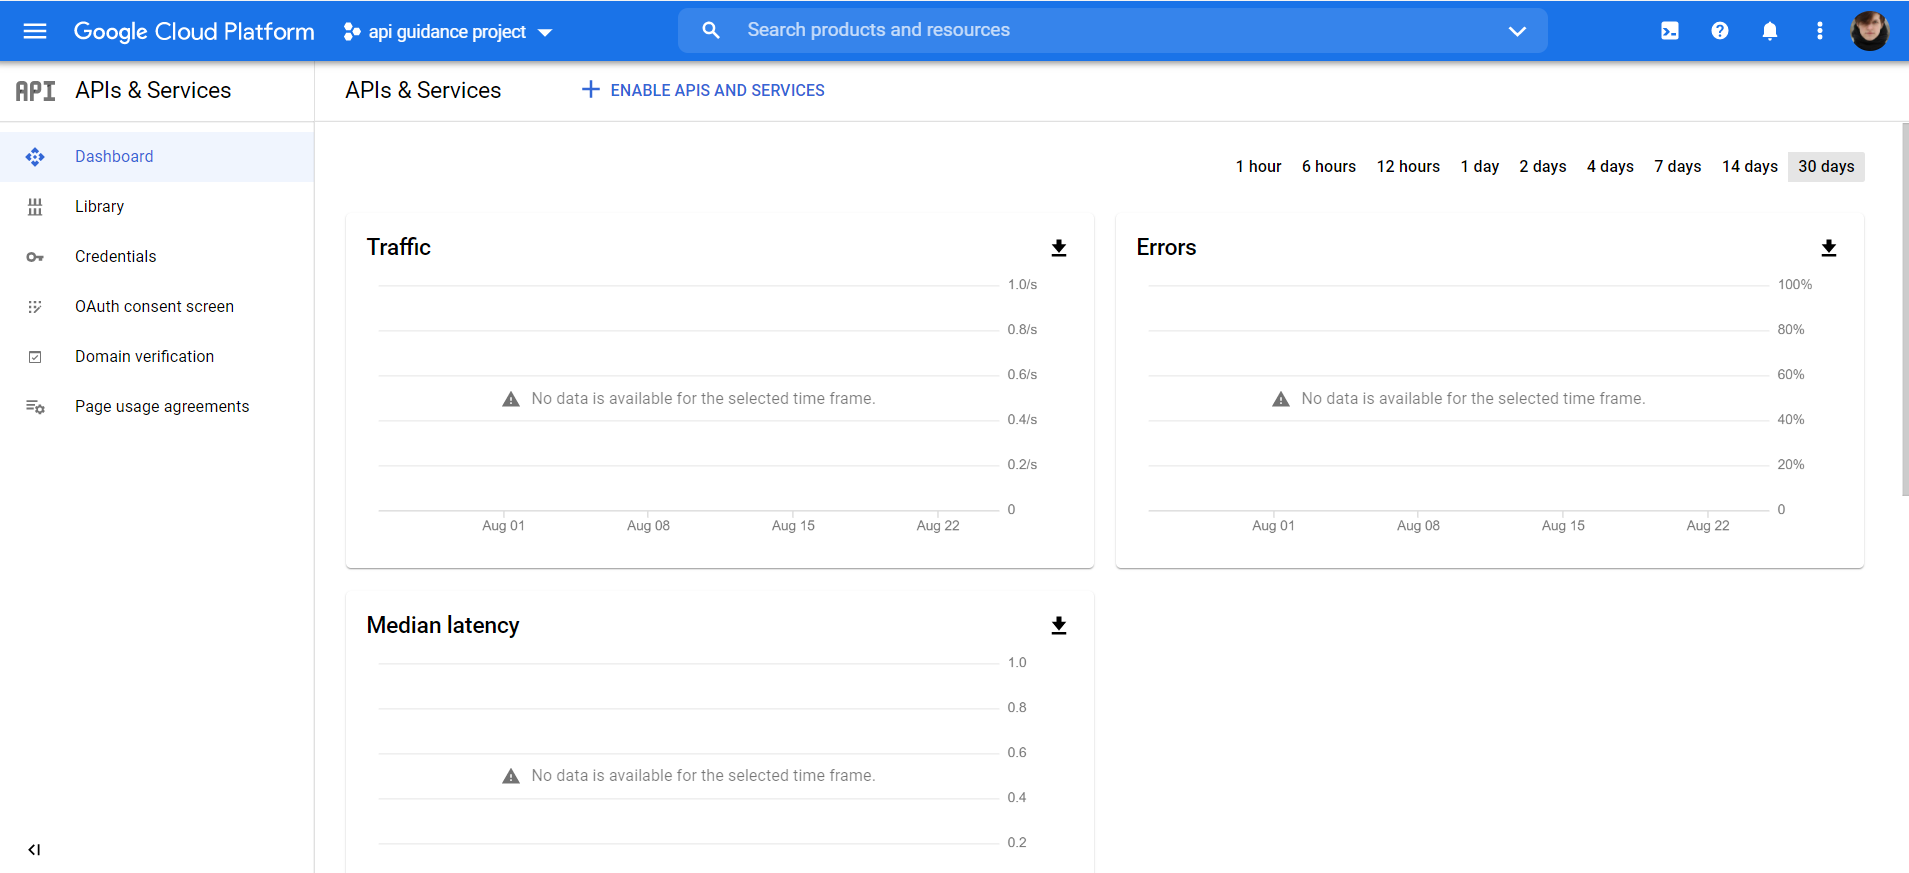

 STEP 3: ADDING YOUTUBE API
 -------------------------
 Click 'ENABLE APIS AND SERVICES'

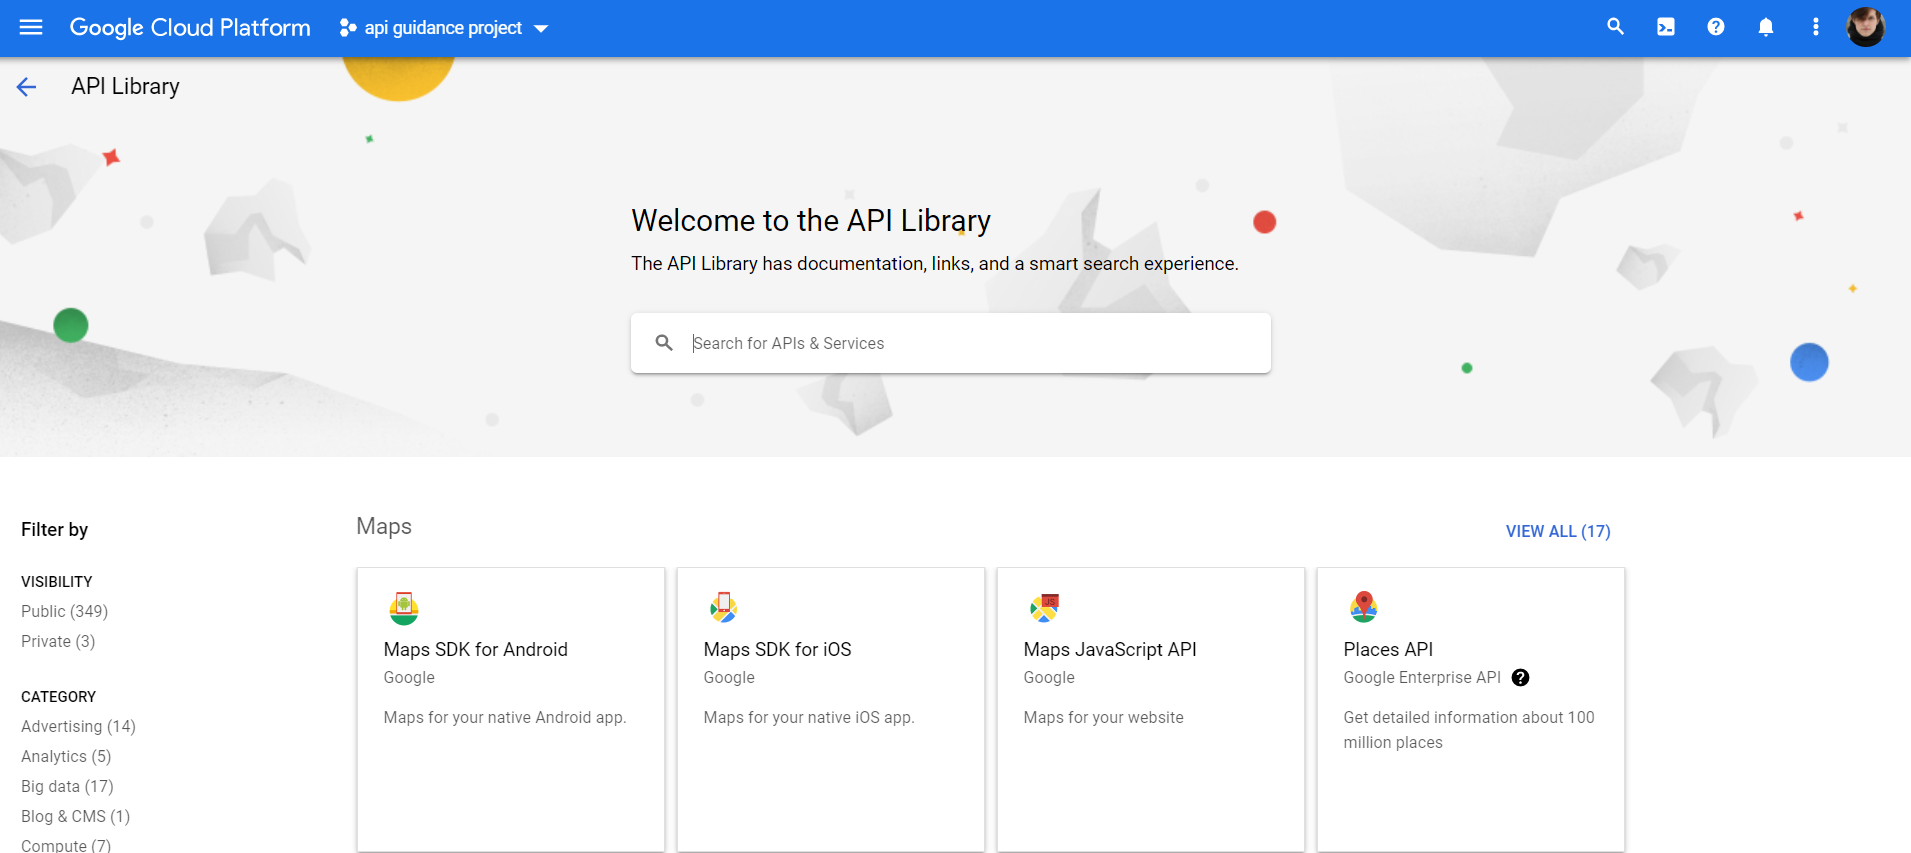

 Type 'YouTube Data API v3'

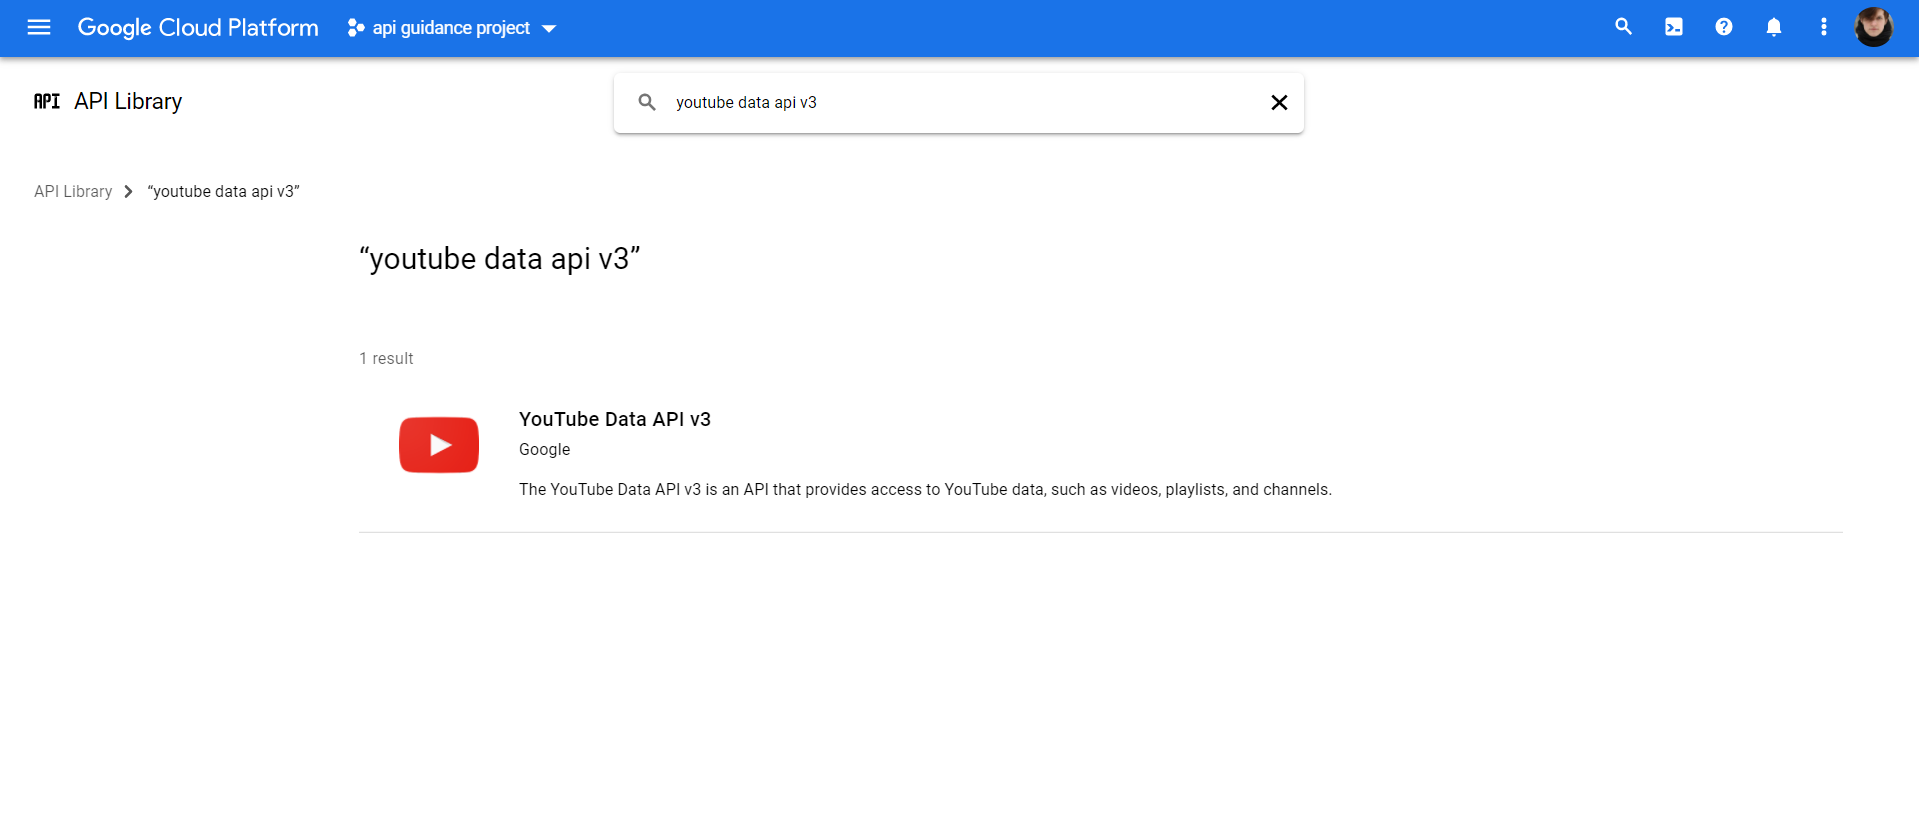

 Click at this only variant, then click 'ENABLE'.
 Get redirected here:

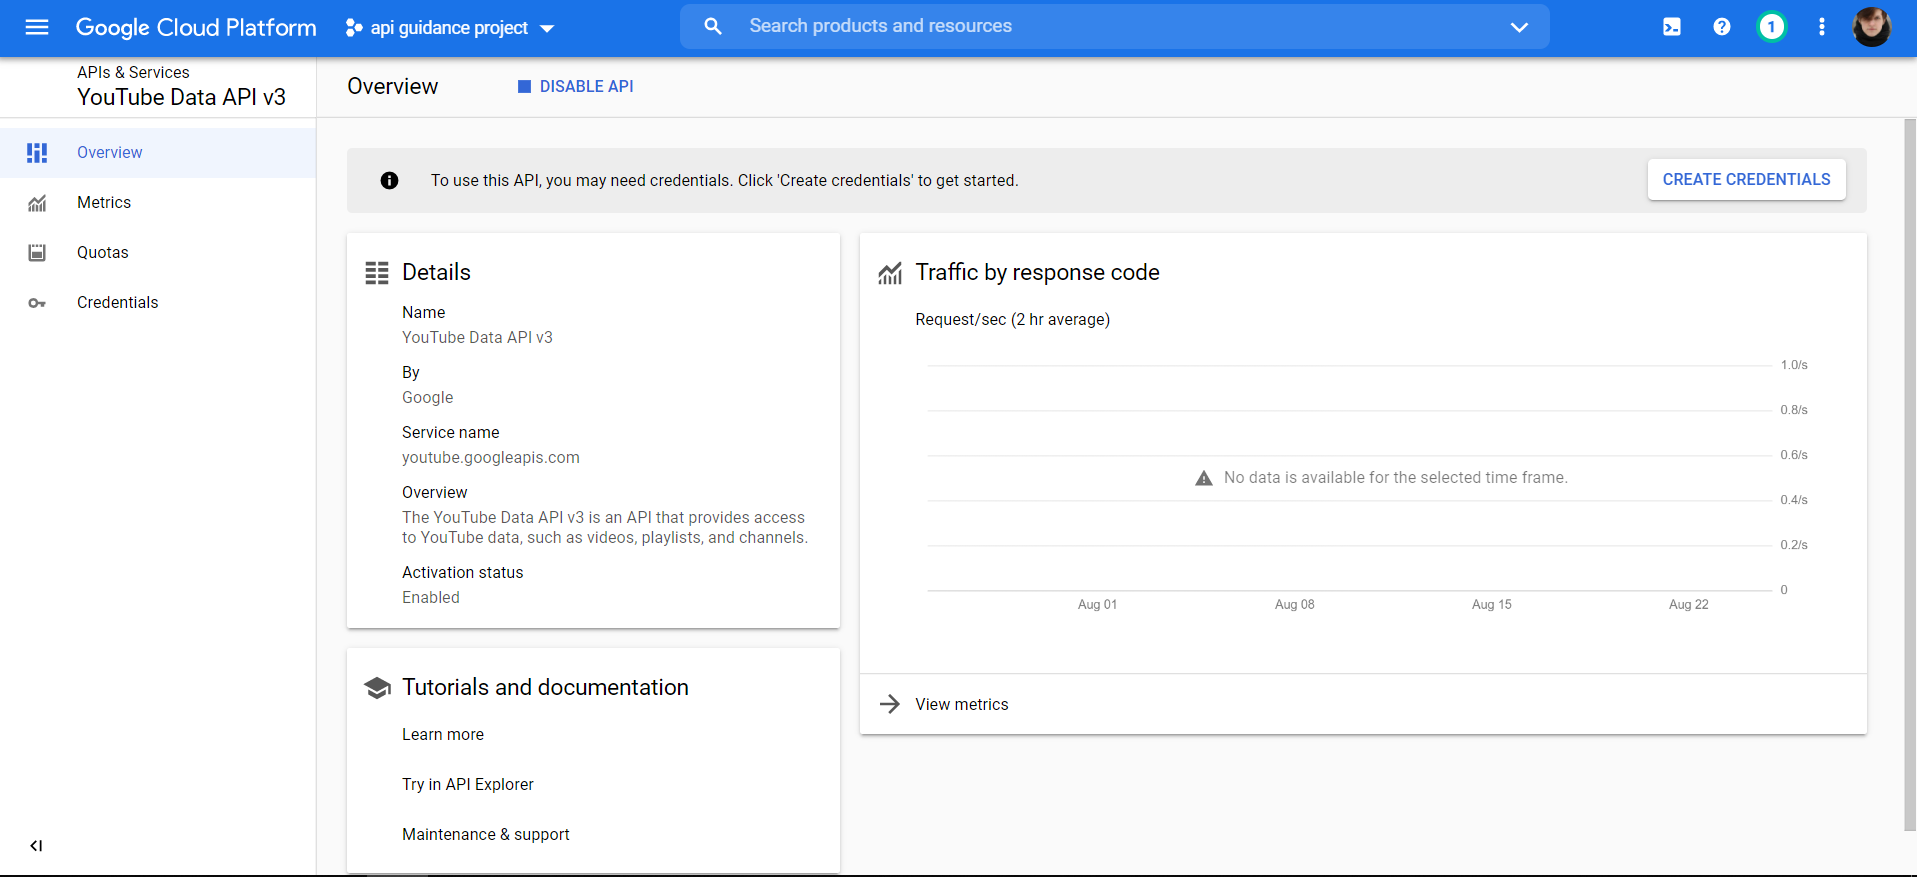

 STEP 4: GETTING API KEY
 ---------------------
 Let's consider we are going to learn how to take public data via this API
 Proceed to 'CREATE CREDENTIALS', select API type
 'YouTube Data API v3', then select an option that you'll access public data.
 The placeholder that is covered purple in the picture is the
 place you find your API key, that is needed to be able to
 use this API. Remember this key. Don't share it as
 this may cause quota leak from your account.

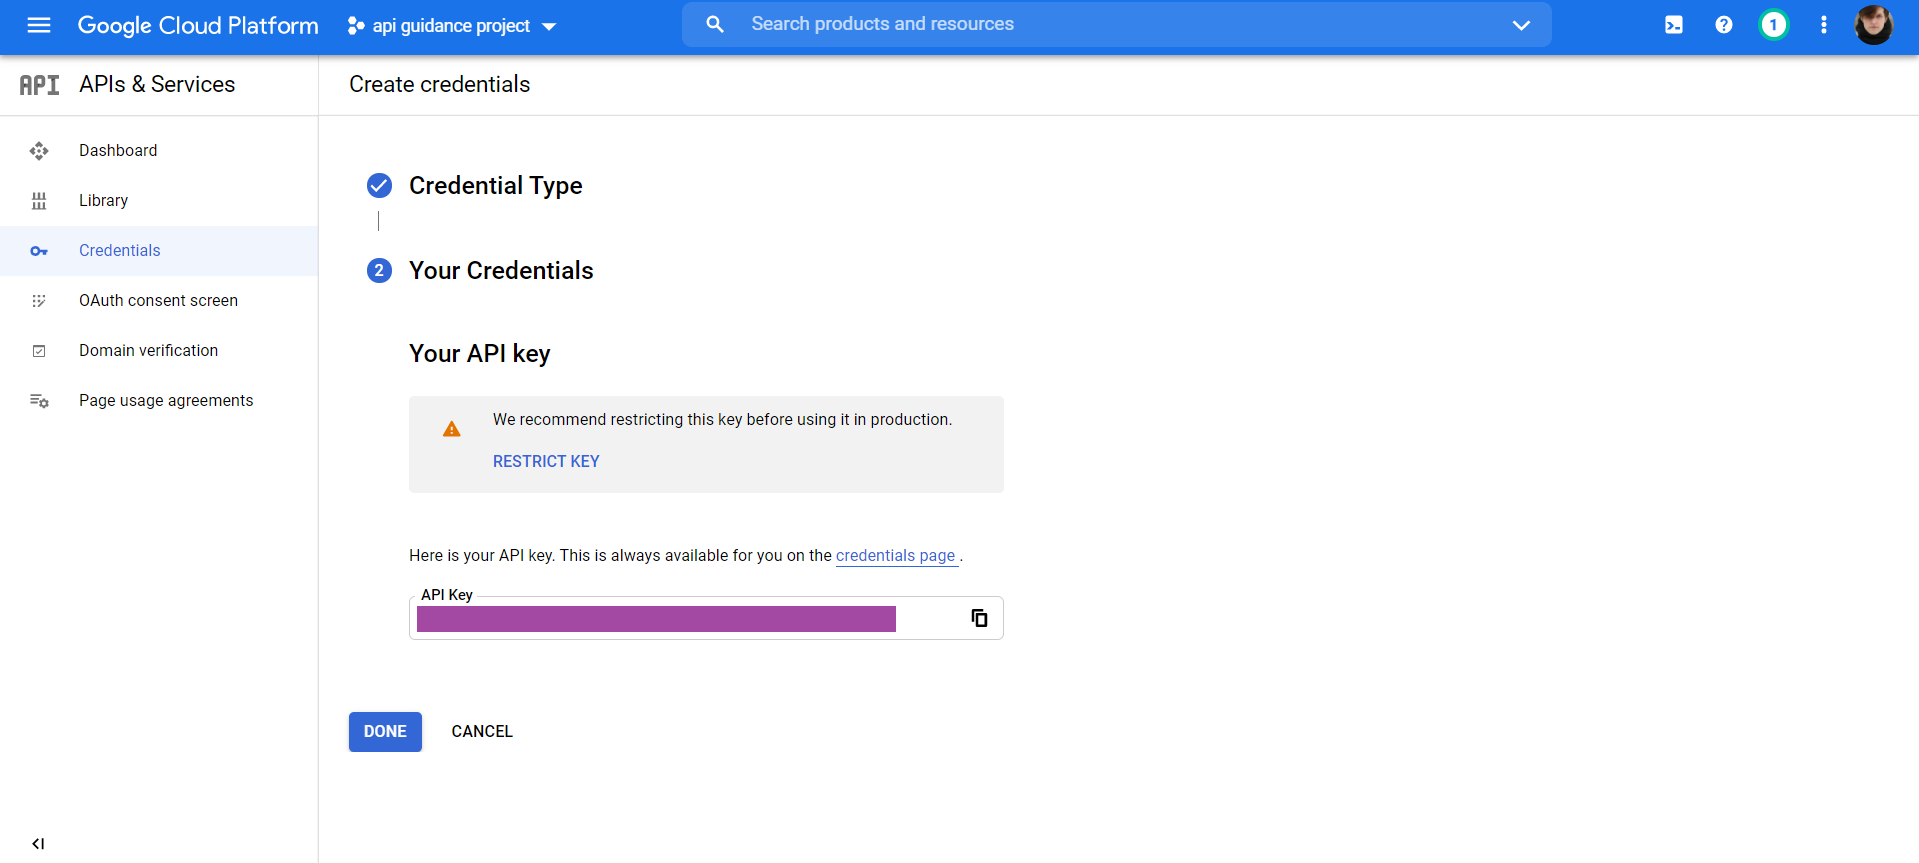

 MORE ABOUT QUOTA
 ----------------
 Here's the list of things you may query and their costs:

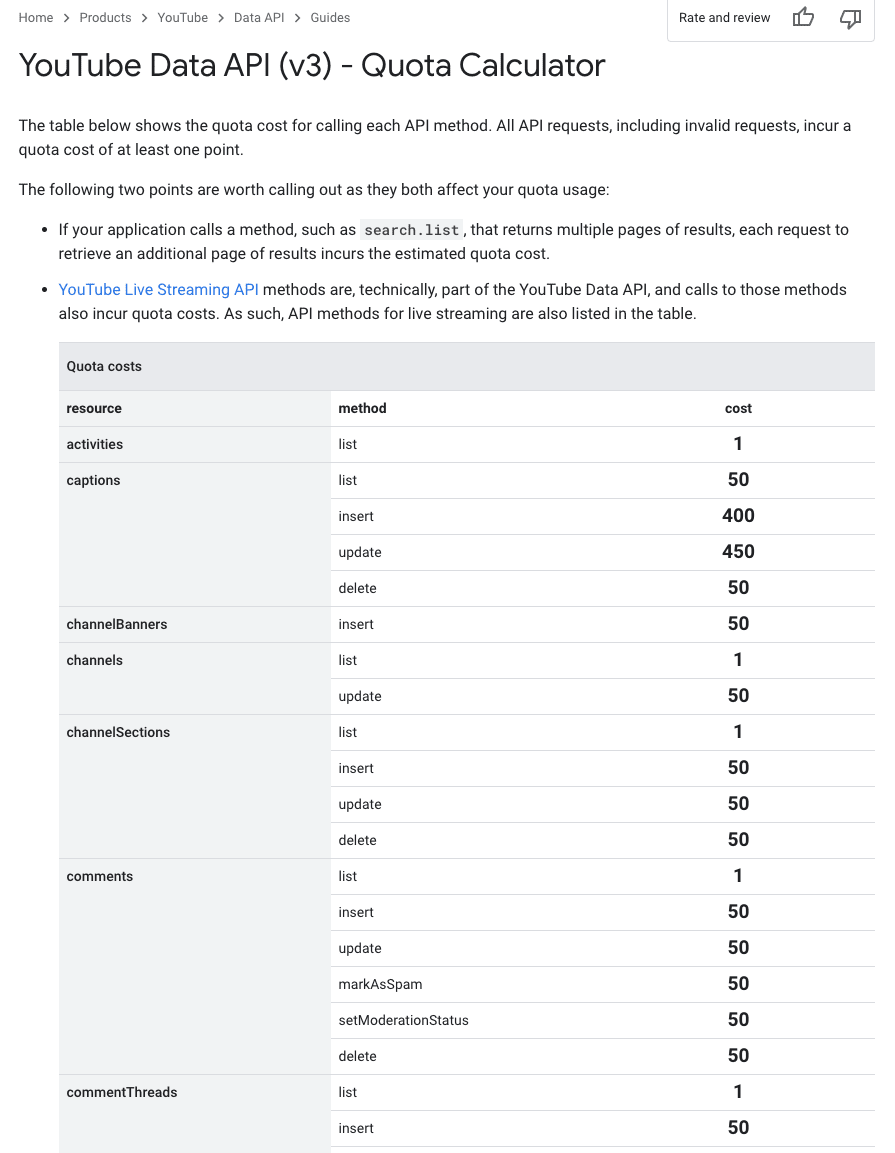

 IDE INSTALLATIONS
 ------------------------------

 You'll need:
 Python 2.7 or Python 3.5+
 The pip package management tool
 The Google APIs Client Library for Python:      

In [ ]:
!pip install --upgrade google-api-python-client

CLIENT CREATION AND FIRST QUERIES
----------------------------------------------------------

 The next thing we need is to create API client.

In [2]:
from googleapiclient.discovery import build

In [73]:
api_key = ...
# stands for your API key

In [4]:
youtube = build('youtube', 'v3', developerKey=api_key)

 If everything is done right, this is client
 that is ready to take your first query

 Lets do something easy - try to fetch some information
 e.g information about some channel and see how it's done

In [ ]:
request = youtube.channels().list(
        part='statistics',
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

 Let me explain :)
 That's how it's done:
 1) `.channels()` is one of YouTube API Instance Methods
 It returns Channels resourse. Other resources we can access
 are: commentThreads, comments, playlists, search, videos, etc.
 full list is available there:
     https://developers.google.com/resources/api-libraries/documentation/youtube/v3/python/latest/
     
 2) `part` argument stands for what kind of information we want
 to pull. Different values require different quota price.
 Let's try out `id` and `snippet` parameters.

In [ ]:
request = youtube.channels().list(
        part='id',
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

In [ ]:
request = youtube.channels().list(
        part='snippet',
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

 That's the information they provide. So taking
 thumbnail picture and subscribers amount requre
 different `part` values. Full list is available there:

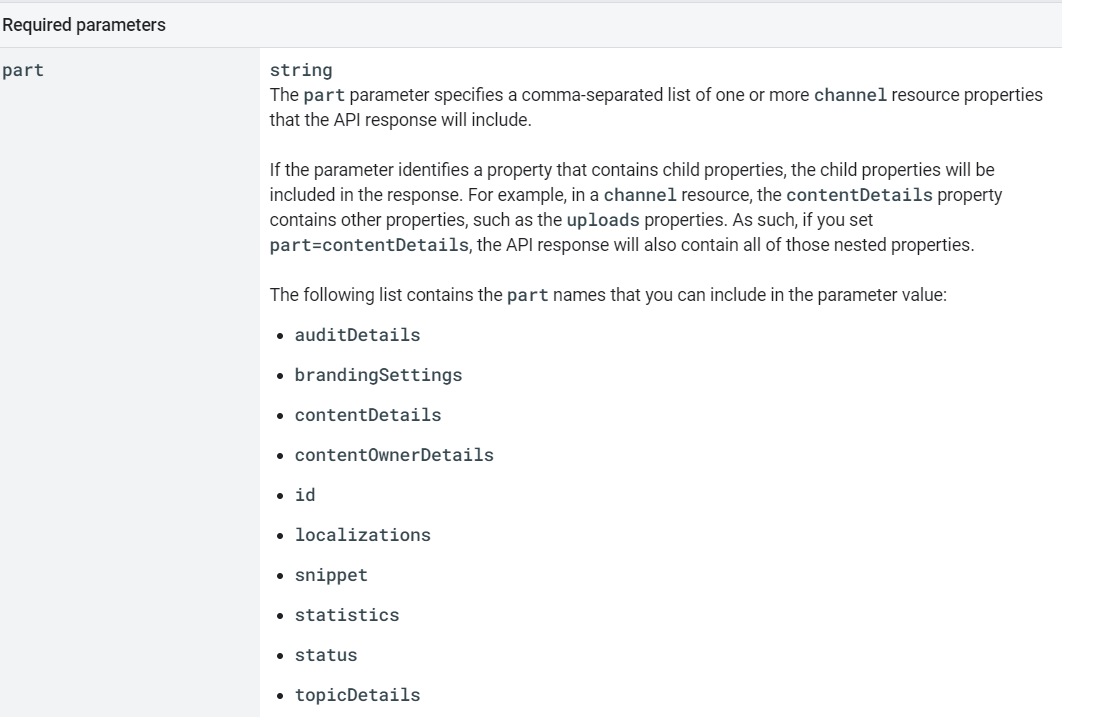

Also we can pass a list of all keywords we want. Then our `items` dict will contain every value we want. Let's try:

In [16]:
request = youtube.channels().list(
        part=['snippet', 'statistics'],
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'TYNVYH0Ap95hd0GU10R8aq4_CbQ', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'Fa_ZpCJK-sHwl-3t16c4mxnntEY', 'id': 'UC-lHJZR3Gqxm24_Vd_AJ5Yw', 'snippet': {'title': 'PewDiePie', 'description': 'I make videos.', 'publishedAt': '2010-04-29T10:54:00Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AKedOLTjRAMaQkJaABC59u63AB9s7UTyQ8enbSoo_TI8cA=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/ytc/AKedOLTjRAMaQkJaABC59u63AB9s7UTyQ8enbSoo_TI8cA=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 240}, 'high': {'url': 'https://yt3.ggpht.com/ytc/AKedOLTjRAMaQkJaABC59u63AB9s7UTyQ8enbSoo_TI8cA=s800-c-k-c0x00ffffff-no-rj', 'width': 800, 'height': 800}}, 'localized': {'title': 'PewDiePie', 'description': 'I make videos.'}, 'country': 'US'}, 'statistics': {'viewCount': '27733102156', 'subscriberCount': '110000000', 'hiddenSubscriberCount

 3) `forUsername` is for setting user whose information
 is going to be taken, obviously.

`list()` is used to get some info we want. Also there's other methods, e.g if we talk about comments, we have `update()` method to add a new comment, `update()` to modify a comment. But that's not things we're currently talking about.

Now every information we require is accessible via:

In [15]:
response['items'][0]

{'kind': 'youtube#channel',
 'etag': 'jdJBNDi9EhKx94ZE3b4lfi9lS1Y',
 'id': 'UC-lHJZR3Gqxm24_Vd_AJ5Yw'}

So if we asked for id or snippet, we can see them here

`response['items']` is a list with single item - dict with all returned additional info we required, for the reason we asked for a single video. We'll see further that there may appear multiple items after querying.

# COMMENTS SCRAPPING

Now we'll try to take list of comments for a certain video.

Say we have this video: https://www.youtube.com/watch?v=jI1qdTr4kco&ab_channel=Kuterfun_Gore

It's done this way:

In [5]:
request = youtube.commentThreads().list(
        part='snippet',
        videoId='jI1qdTr4kco',
        order='relevance',
        maxResults=15
)

response = request.execute()

Let's talk about parameters we just passed.

`part` is already known.

`videoId` defines video we want to scrap. Id is this part of the video link:
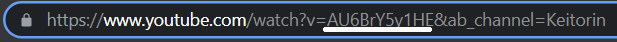
`order` is optional, sets if we take the newest comments or the most relevant (according to the YouTube opinion :) )

`maxResults` makes upper boundary for the amount of comments we can get.

In [6]:
print(response)

{'kind': 'youtube#commentThreadListResponse', 'etag': '1SMRDtzwB7LdJ7IQEQVIkx6GS2I', 'nextPageToken': 'QURTSl9pMmdGbV90cTVlNklEeVF1bFVpeEMwTXhuTzhqVkd3b0pMMVNGa2U5RE54VnZFWlZtMVktWkRmR1dOTmNEWXUxenJIMWNNQmUzaGVsZnl1aTdZYmRKN1o3VUF4eWR3eVFwS1lzUTBZSVpiZ0UtbC1PcHhiRktXXzFEUWtiZVN6a2E1YjVwMVpTTXlFeUpOSUZHdlY4R2V0NFFHVldrN0k5ZWlsazVSNWJoM2hrbGFhVGlqNmxYT3YyUXR0Zkt0NWViSWt1cFVYV0JhUmMzMHNLd0MwX3NYa2JqTzlzeWtzSTFaSVhWWVBSbHFyRjF2Mkhla0lNWk5RUzRhaXh1Z2Q5NHFf', 'pageInfo': {'totalResults': 15, 'resultsPerPage': 15}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'wzIIl9DuCVfkm1apxbkBUX2P5a0', 'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg', 'snippet': {'videoId': 'jI1qdTr4kco', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 's0jqo2QynUXSqQ4u8kXe_TAo73s', 'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg', 'snippet': {'videoId': 'jI1qdTr4kco', 'textDisplay': 'мне понравился момент где кот флексит в наушниках', 'textOriginal': 'мне понравился момент где кот флексит в наушниках', 'authorDisplayName': 'metarie', 

Looks frightful. We should definitely do something with it. Let's see how can we turn this into some pretty print format. We can access any data from here using `[]` operator, as it's a structure of dicts:

In [17]:
response['items']

[{'kind': 'youtube#commentThread',
  'etag': 'wzIIl9DuCVfkm1apxbkBUX2P5a0',
  'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg',
  'snippet': {'videoId': 'jI1qdTr4kco',
   'topLevelComment': {'kind': 'youtube#comment',
    'etag': 's0jqo2QynUXSqQ4u8kXe_TAo73s',
    'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg',
    'snippet': {'videoId': 'jI1qdTr4kco',
     'textDisplay': 'мне понравился момент где кот флексит в наушниках',
     'textOriginal': 'мне понравился момент где кот флексит в наушниках',
     'authorDisplayName': 'metarie',
     'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj',
     'authorChannelUrl': 'http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A',
     'authorChannelId': {'value': 'UCYz4wQ1JDIACjUeKXLvla_A'},
     'canRate': True,
     'viewerRating': 'none',
     'likeCount': 4667,
     'publishedAt': '2020-03-02T14:08:19Z',
     'updatedAt': '2020-03-02T14:08:19Z'}},
   'canReply': True,
   'totalReplyCount': 102,

In [19]:
response['items'][0]['snippet']

{'videoId': 'jI1qdTr4kco',
 'topLevelComment': {'kind': 'youtube#comment',
  'etag': 's0jqo2QynUXSqQ4u8kXe_TAo73s',
  'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg',
  'snippet': {'videoId': 'jI1qdTr4kco',
   'textDisplay': 'мне понравился момент где кот флексит в наушниках',
   'textOriginal': 'мне понравился момент где кот флексит в наушниках',
   'authorDisplayName': 'metarie',
   'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj',
   'authorChannelUrl': 'http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A',
   'authorChannelId': {'value': 'UCYz4wQ1JDIACjUeKXLvla_A'},
   'canRate': True,
   'viewerRating': 'none',
   'likeCount': 4667,
   'publishedAt': '2020-03-02T14:08:19Z',
   'updatedAt': '2020-03-02T14:08:19Z'}},
 'canReply': True,
 'totalReplyCount': 102,
 'isPublic': True}

In [20]:
response['items'][0]['snippet']['topLevelComment']['snippet']

{'videoId': 'jI1qdTr4kco',
 'textDisplay': 'мне понравился момент где кот флексит в наушниках',
 'textOriginal': 'мне понравился момент где кот флексит в наушниках',
 'authorDisplayName': 'metarie',
 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj',
 'authorChannelUrl': 'http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A',
 'authorChannelId': {'value': 'UCYz4wQ1JDIACjUeKXLvla_A'},
 'canRate': True,
 'viewerRating': 'none',
 'likeCount': 4667,
 'publishedAt': '2020-03-02T14:08:19Z',
 'updatedAt': '2020-03-02T14:08:19Z'}

In [21]:
response['items'][0]['snippet']['topLevelComment']['snippet']['textOriginal']

'мне понравился момент где кот флексит в наушниках'

• `['items']` accesses all elements (comments) that were returned.

• `['items'][0]['snippet']` brings us to a certain comment's information.

• `['items'][0]['snippet']['topLevelComment']['snippet']` gives top level comment (not replies) and its snippet.

• `['items'][0]['snippet']['topLevelComment']['snippet']['textOriginal']` - text of the needed comment in the original version as it had been written.

So we can present data like this:

In [26]:
comment_cat_0 = response['items'][0]['snippet']['topLevelComment']['snippet']

print('Author:', comment_cat_0['authorDisplayName'], ', ', comment_cat_0['authorChannelUrl'])
print('Avatar picture link:', comment_cat_0['authorProfileImageUrl'])
print('Text:', comment_cat_0['textOriginal'])
print('Like count:', comment_cat_0['likeCount'])

Author: metarie ,  http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A
Avatar picture link: https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj
Text: мне понравился момент где кот флексит в наушниках
Like count: 4667


# CREATING DATASET WITH COMMENTS

Ok, now let's see a task of creating a dataset of comments under some certain videos.

Elements we'll add there as features are the following:

• comment text

• like count

• id of video to which this comment relates

• author id

Videos to proceed:

https://www.youtube.com/watch?v=dQw4w9WgXcQ

https://www.youtube.com/watch?v=jI1qdTr4kco

https://www.youtube.com/watch?v=ByH9LuSILxU

https://www.youtube.com/watch?v=G1IbRujko-A

https://www.youtube.com/watch?v=9l49bfP3nso

https://www.youtube.com/watch?v=pCOb6Fykxz0

https://www.youtube.com/watch?v=HPd2hiYreyc

I'll use `urlparse` to get video id value right from link.

In [45]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
from urllib.parse import parse_qs

In [46]:
def url_get_param_val(url, param):
    parsed_url = urlparse(url)
    param_value = parse_qs(parsed_url.query)[param][0]
    return param_value

In [69]:
df = pd.DataFrame(columns=['like_count', 'related_video_id', 'author_id', 'text'])

video_links = [
    'https://www.youtube.com/watch?v=ByH9LuSILxU',
    'https://www.youtube.com/watch?v=dQw4w9WgXcQ',
    'https://www.youtube.com/watch?v=jI1qdTr4kco',
    'https://www.youtube.com/watch?v=G1IbRujko-A',
    'https://www.youtube.com/watch?v=9l49bfP3nso',
    'https://www.youtube.com/watch?v=pCOb6Fykxz0',
    'https://www.youtube.com/watch?v=HPd2hiYreyc'
]

comments_quantity = 100

for video_link in video_links:
    video_id = url_get_param_val(video_link, 'v')
     
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        order='relevance',
        maxResults=comments_quantity
    )
    
    response = request.execute()
    for item in response['items']:
        new_row = {}
        new_row['text'] = item['snippet']['topLevelComment']['snippet']['textOriginal']
        new_row['author_id'] = item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
        new_row['related_video_id'] = item['snippet']['videoId']
        new_row['like_count'] = item['snippet']['topLevelComment']['snippet']['likeCount']
        df = df.append(new_row, ignore_index=True)

In [70]:
df

,like_count,related_video_id,author_id,text
0,10,ByH9LuSILxU,UCLE0D_bL8ElmXI0hZLKx7cA,cute
1,0,ByH9LuSILxU,UC7gCJ6osxjQU1cj3D7Ok9gw,Soooooo cute 😂
2,0,ByH9LuSILxU,UCcyBKEID6XPFrdJNIiBs35w,I wanna buy a cat:(
3,2,ByH9LuSILxU,UCe_N6gvE55Sddgvp8i1Eduw,Sooooooooooooooooooooooooooooooooooo cute
4,0,ByH9LuSILxU,UCo2AhlHh597gNq5VxU-T9HA,😂🤣😅
...,...,...,...,...
691,1,HPd2hiYreyc,UCPb0pFHEJUtDBhgDtP_Gozg,Pilot: i dont wanna help an impostor\nPilot: *...
692,1559,HPd2hiYreyc,UCEU7w9Cq1WYImCEbgdgvDhQ,"Technically, he saved himself from getting kil..."
693,0,HPd2hiYreyc,UCPMCT5k3P7lFCuIMWwMku8A,"6 seconds in, the audio quality starts dropping."
694,0,HPd2hiYreyc,UCktOjKAIf3aWzhcUb8vnXDg,21st Century Humour at its finest


Boom, we've just scrapped some comments nice and quick. Response of this API is pretty intuitive to deal with. But I'll show you one more time how these responses essentially are made up.

We have `response`, which contains some main information about itself, its type (e.g youtube#commentThreadListResponse), some other basic info.

There we also have `response[items]`. It's a list with returned information that we requested. For example, comments.

`response[items][i]` is a comment, and this entity contains its basic information along with 'extra data' we requested. It is just `id`, `snippet`, `replies`, or any combination of them. 

`response[items][i][id]` contains unique identifier.

`response[items][i][replies]` have Comment entities with all information about comments that are replies to current related comment.

`response[items][i][snippet]` has main information about this commentThread enity, such as amount of replies, its top level comment, flag if we can reply to this comment, related video id, etc.

`response[items][i][snippet][topLevelComment]` is similar to `response` in structure.

And `response[items][i][snippet][topLevelComment][snippet]` is a Comment entity too, so it has all information about comment, such as `videoId`, `textDisplay`, `textOriginal` ,`authorDisplayName`, `authorProfileImageUrl`, `authorChannelUrl`, `authorChannelId`, `canRate`, `viewerRating`, `likeCount`, `publishedAt`, `updatedAt`.


That's all about structure as well as usage of this API in comment scrapping context.

# ТУТОРИАЛ ПО YOUTUBE API

 YouTube API предоставляет нам возможности получать многие данные с 
 сайта YouTube. Комментарии, видео, которые выдаются в ответ на
 ваш поисковой запрос, список видео, загруженных конкретным пользователем,
 ответы на комментарии, и т.д.
 Это официальное API, спроектированное профессионалами, поэтому оно работает хорошо. Однако, оно ограничено в бесплатном использовании:
 в день выдается 10 000 очков - ваша квота. 
 Каждое действие в API, каждый ответ сервера стоит определенную цену.

НАЧАЛО РАБОТЫ
--------------

 ШАГ 1: Вход в Google Developers Console
 -------------
 https://console.cloud.google.com/apis/dashboard
 
 
 Вы должны войти сюда, используя свой аккаунт Google. Если у вас его нет, то сначала его нужно зарегистрировать.

 ШАГ 2: Создание нового проекта
 -------------
 Как только вы зайдете, вас закинет на пустую доску. Нажмите на кнопку 'CREATE PROJECT' в правом верхнем углу. Вы попадете на экран, где можно добавить имя проекта, выбрать свою организацию и выбрать локацию (URL). Вы можете создать проект и без организации. Если у вас её нет, то вам не предложится выбрать локацию.
 
 После того как это будет сделано, вы увидите это:

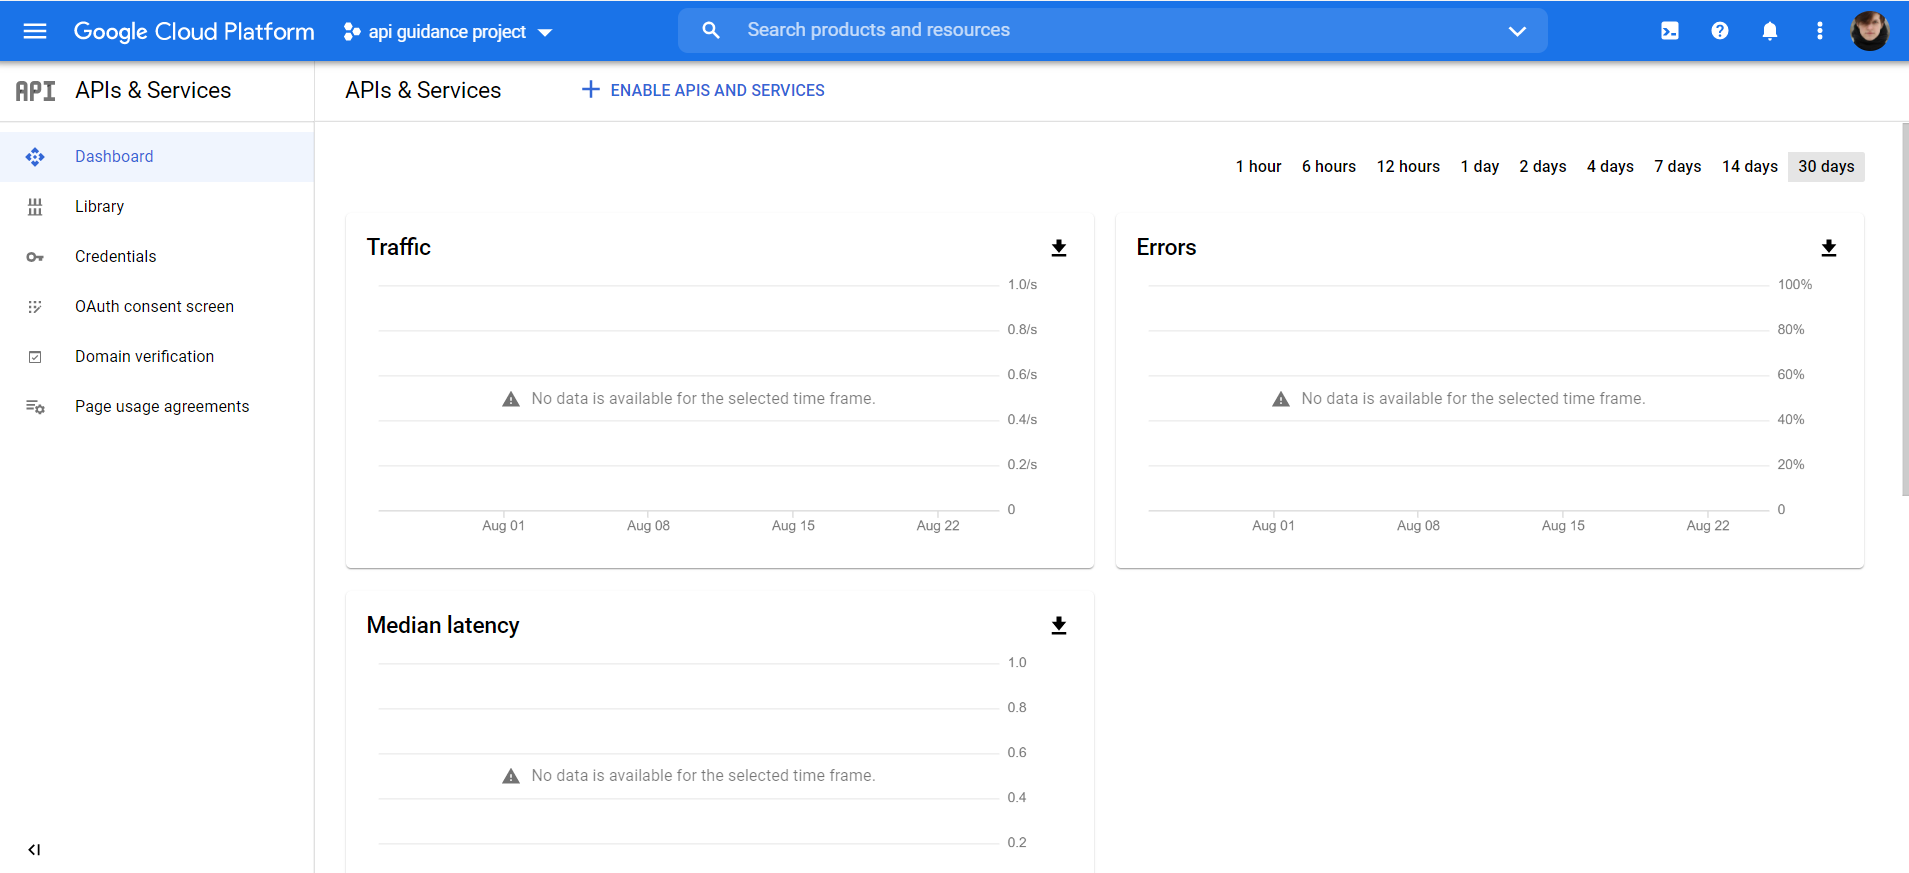

 ШАГ 3: Добавление YouTube API
 -------------------------
 Нажмите 'ENABLE APIS AND SERVICES'

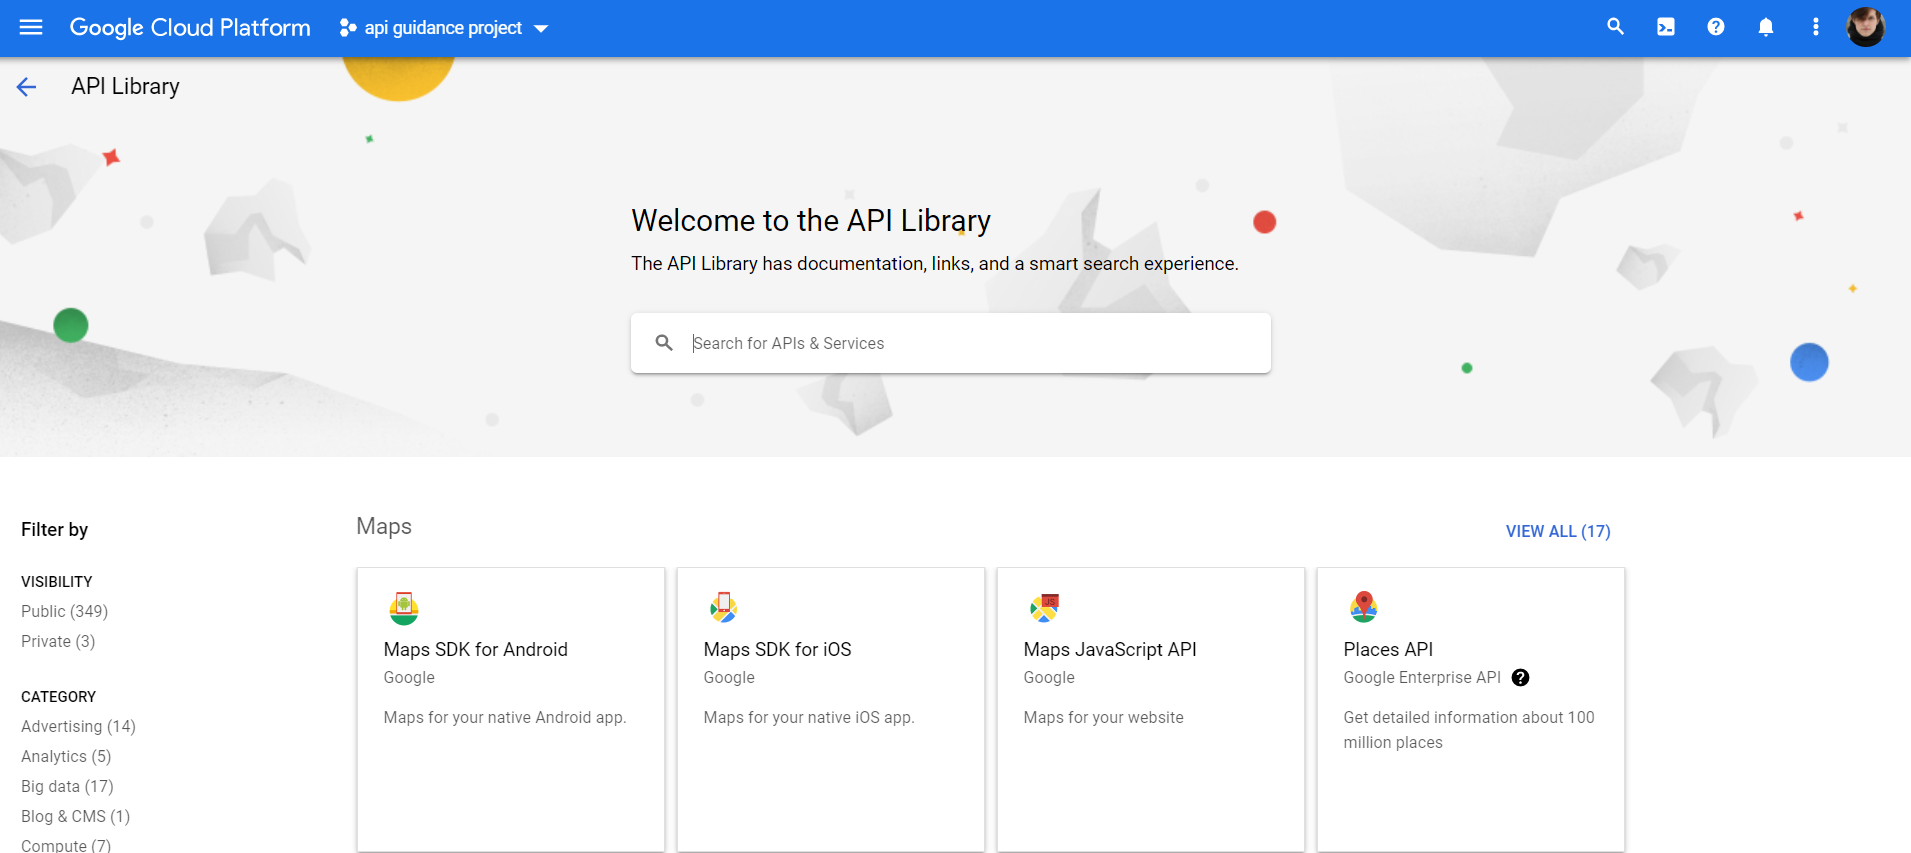

 Введите 'YouTube Data API v3'

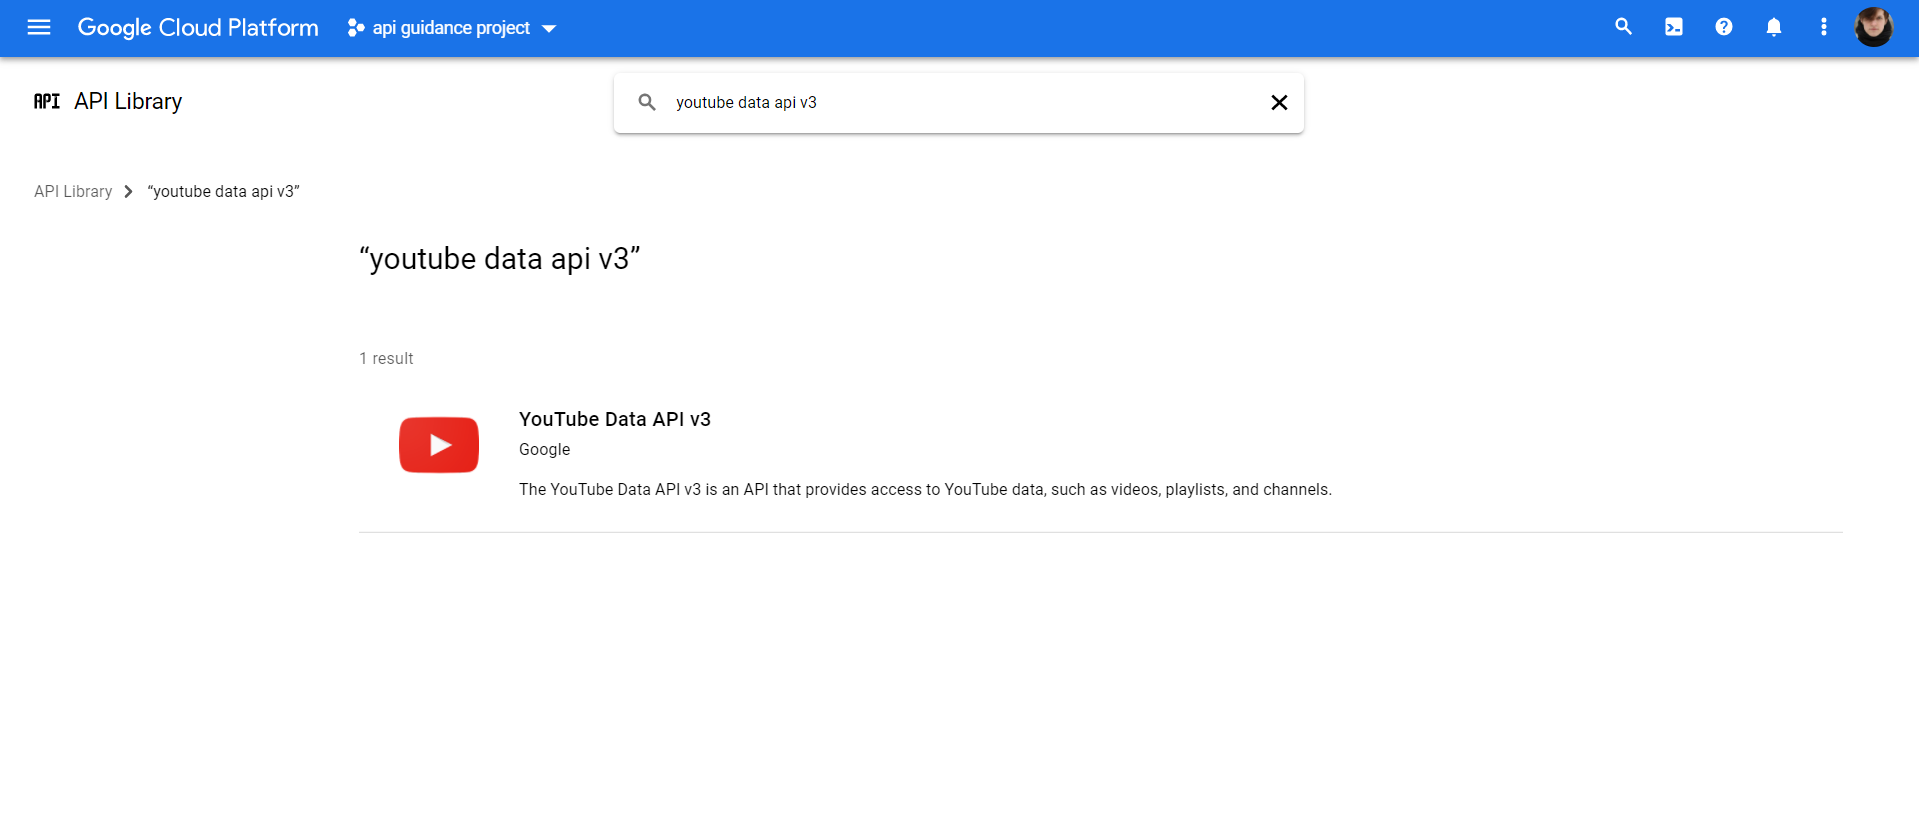

 Кликните на этот единственный предлагаемый вариант и нажмите 'ENABLE'.
 Вы будете перенаправлены сюда:

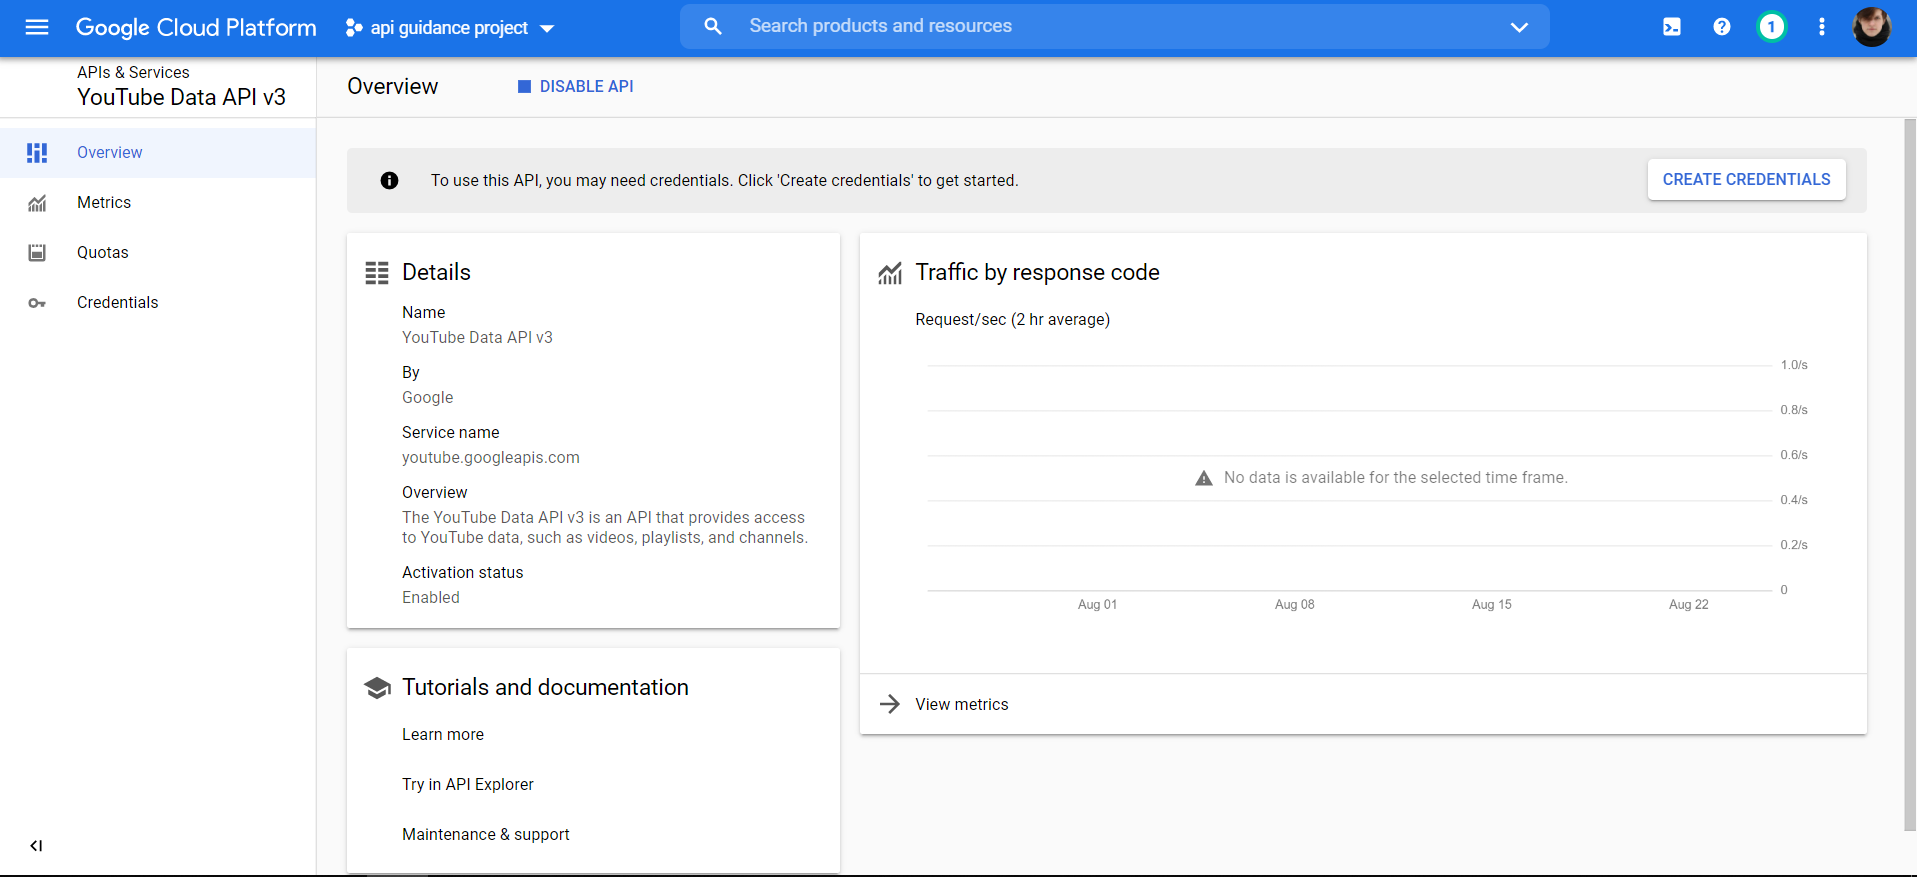

 ШАГ 4: Получение ключа API
 ---------------------
 Будем считать, что мы собираемся изучить, как берутся публичный данный используя это API. Нажмите на 'CREATE CREDENTIALS', выберите тип API 'YouTube Data API v3', потом выберите опцию, что вы хотите получить доступ к публичным данным.
 На месте, которое на скриншоте закрашено фиолетовым, будет ваш ключ API, который необходим, чтобы это API использовать. Запомните его. Не делитесь им и никуда не выставляйте, потому что это может повлечь утечку квоты с вашего аккаунта.

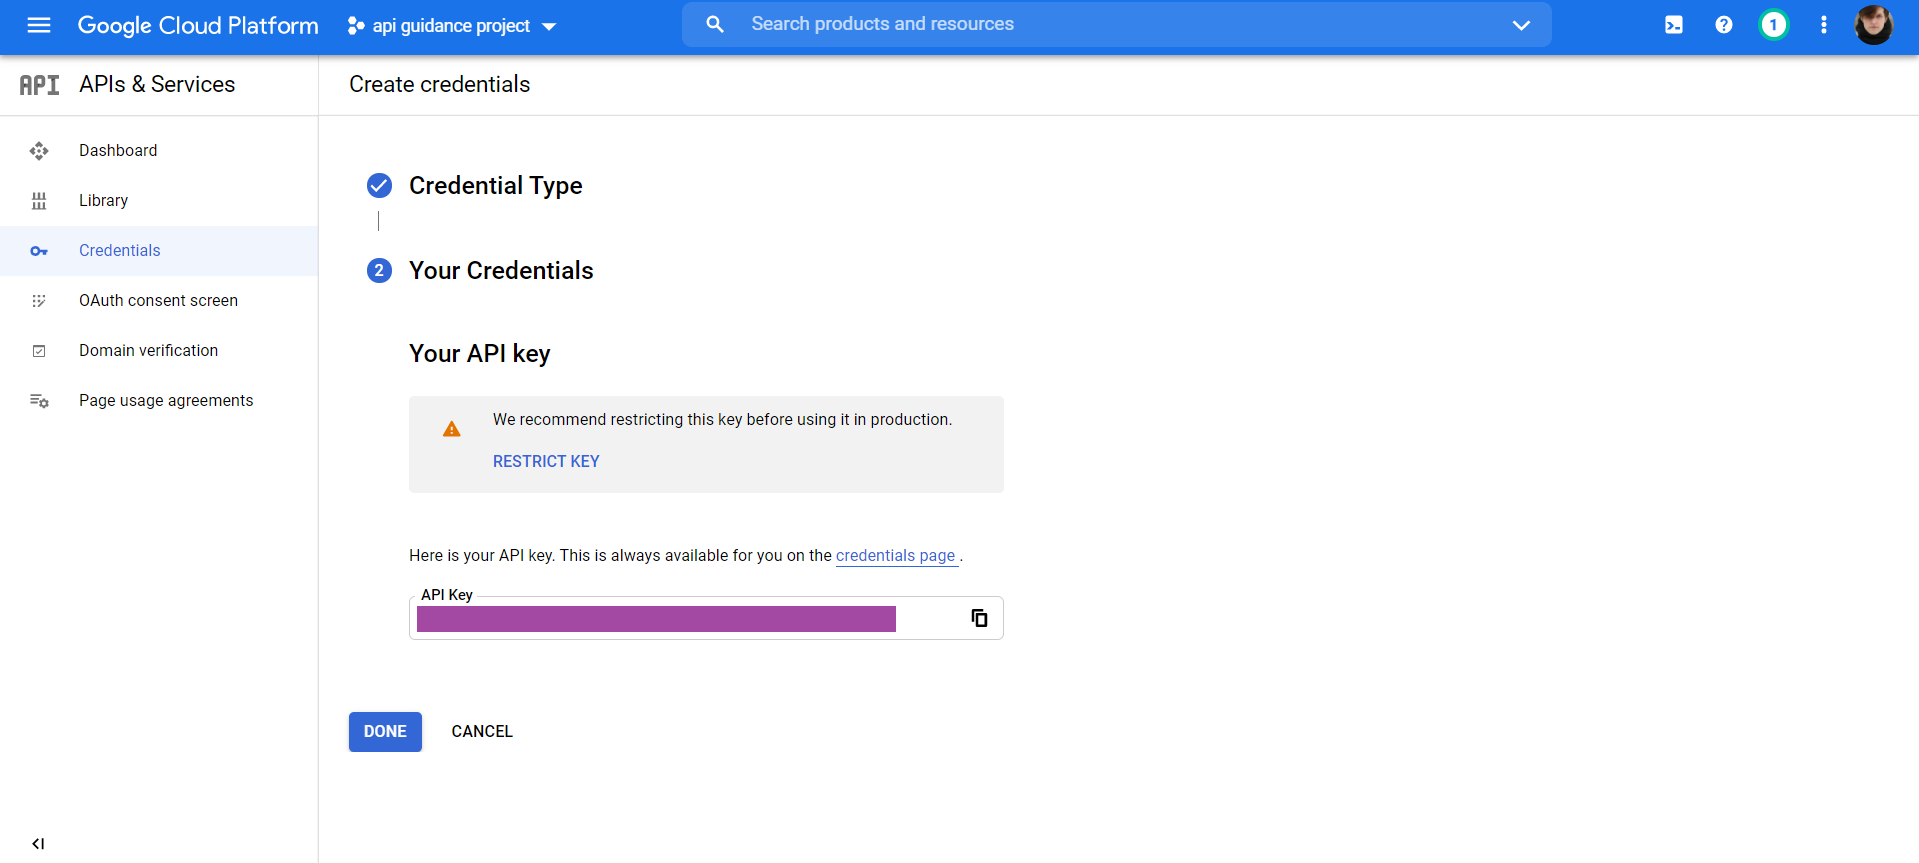

Больше про квоту
 ----------------
 Вот список вещей, которые вы можете запрашивать, и их стоимости:

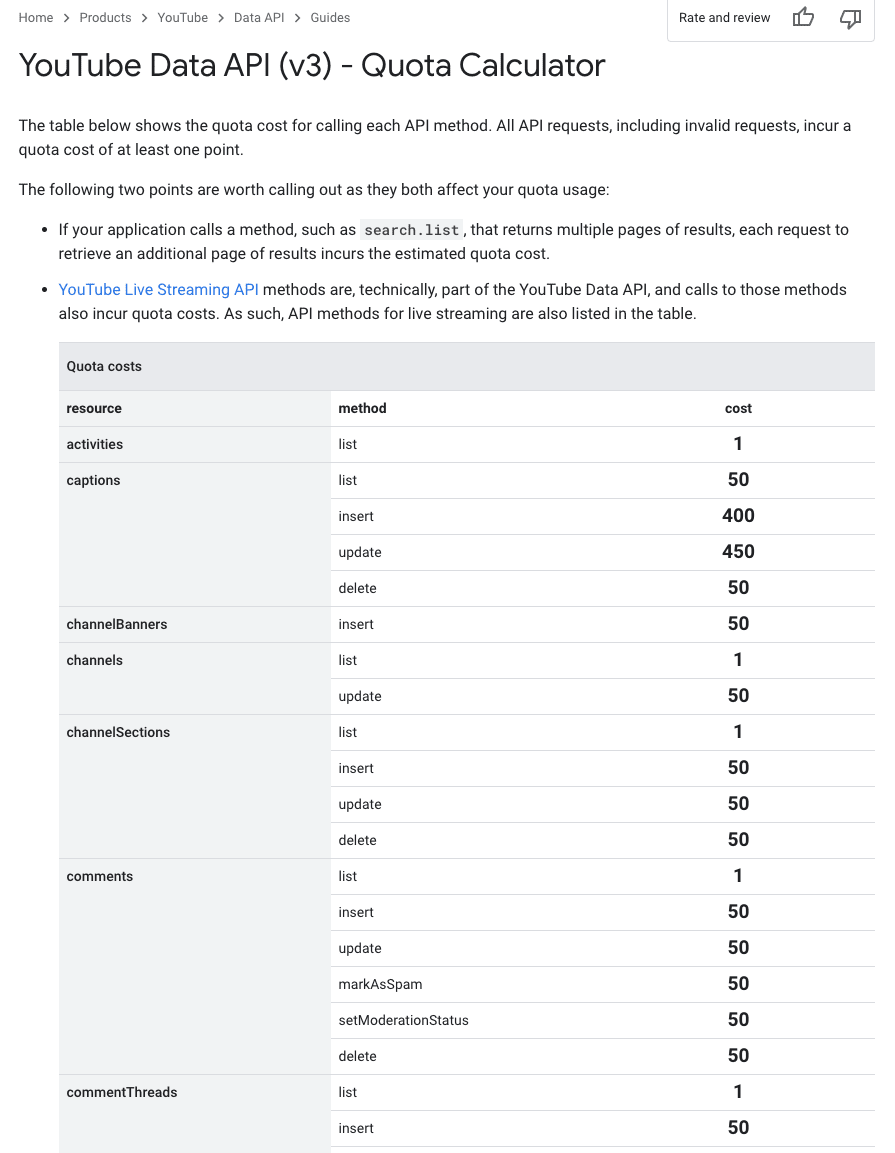

 УСТАНОВКИ В IDE
 ------------------------------
Вам понадобится:

Python 2.7 или Python 3.5+

Инструмент управления пакетами `pip`

Google APIs Client Library для Python:      

In [ ]:
!pip install --upgrade google-api-python-client

СОЗДАНИЕ КЛИЕНТА И ПЕРВЫЕ ЗАПРОСЫ
----------------------------------------------------------


 Следующее что нам нужно - создать клиент API.

In [2]:
from googleapiclient.discovery import build

In [73]:
api_key = ...
# stands for your API key

In [4]:
youtube = build('youtube', 'v3', developerKey=api_key)

Если всё сделано правильно, то это уже клиент, готовый принять ваш первый запрос.
 
 Давайте сделаем что-нибудь простое - попробуем вытащить хоть какую-то информацию, например, информацию о каком-то канале, и посмотрим, как это делается.

In [ ]:
request = youtube.channels().list(
        part='statistics',
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

Дайте-ка объясню :)
 
 Это работает так:
 
 1)`.channels()` это один из экземплярных методов YouTube API
 Он возвращает ресурс Каналов. Другие ресурсы, к которым можно доступиться: commentThreads, comments, playlists, search, videos, и т.д.
 Полный список здесь:
      https://developers.google.com/resources/api-libraries/documentation/youtube/v3/python/latest/
      
2) аргумент `part` нужен для того, чтобы определить, что за информацию мы хотим вытянуть. Разные значения требуют разной цены квоты. Давайте попробуем параметры `id` и `snippet`.

In [ ]:
request = youtube.channels().list(
        part='id',
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

In [ ]:
request = youtube.channels().list(
        part='snippet',
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

Вот, какую информацию они предоставляют. Так что, чтобы взять миниатюру канала и количество подписчиков канала, нам потребуются разные значения `part`. Полный список доступных здесь:

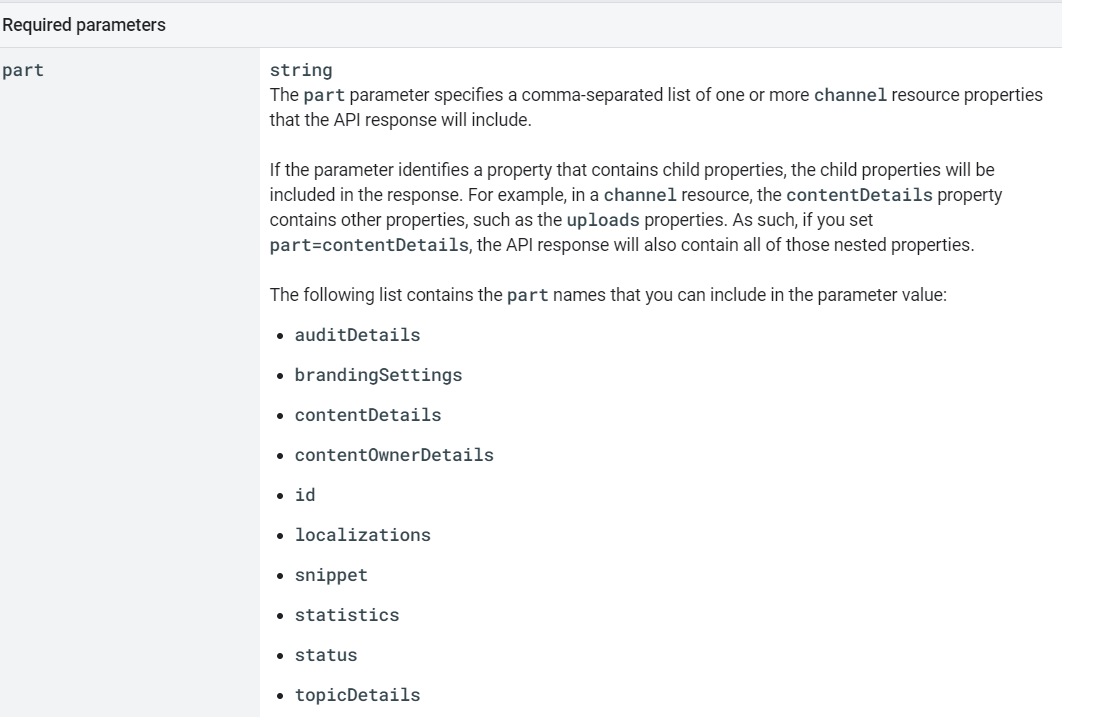

Также можно передать список из ключевых слов, какие мы хотим. Тогда наш словать `items` будет содержать каждое из этих значений. Попробуем:

In [16]:
request = youtube.channels().list(
        part=['snippet', 'statistics'],
        forUsername='PewDiePie'
)
response = request.execute()

print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'TYNVYH0Ap95hd0GU10R8aq4_CbQ', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'Fa_ZpCJK-sHwl-3t16c4mxnntEY', 'id': 'UC-lHJZR3Gqxm24_Vd_AJ5Yw', 'snippet': {'title': 'PewDiePie', 'description': 'I make videos.', 'publishedAt': '2010-04-29T10:54:00Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AKedOLTjRAMaQkJaABC59u63AB9s7UTyQ8enbSoo_TI8cA=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/ytc/AKedOLTjRAMaQkJaABC59u63AB9s7UTyQ8enbSoo_TI8cA=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 240}, 'high': {'url': 'https://yt3.ggpht.com/ytc/AKedOLTjRAMaQkJaABC59u63AB9s7UTyQ8enbSoo_TI8cA=s800-c-k-c0x00ffffff-no-rj', 'width': 800, 'height': 800}}, 'localized': {'title': 'PewDiePie', 'description': 'I make videos.'}, 'country': 'US'}, 'statistics': {'viewCount': '27733102156', 'subscriberCount': '110000000', 'hiddenSubscriberCount

 3) `forUsername` - для того, чтобы определить пользователя, чью информацию мы собираемся взять, очевидно

`list()` используется для того, чтобы получать информацию. Также есть другие методы, например если мы говорим про комментарии, то там имеется метод `add()`, чтобы добавить новый комментарий, `update()`, чтобы изменить уже существующий. Но сейчас не об этом.

Теперь всю информация, что нам нужна, доступна через:

In [15]:
response['items'][0]

{'kind': 'youtube#channel',
 'etag': 'jdJBNDi9EhKx94ZE3b4lfi9lS1Y',
 'id': 'UC-lHJZR3Gqxm24_Vd_AJ5Yw'}

Поэтому если мы запрашивали id или snippet - мы их увидим там.

`response['items']` это список с единственным элементом - словарем со всей возвращенной информацией, что мы запрашивали, потому что запрос был на одно видео. Мы потом посмотрим, что там могут оказаться несколько значений после запроса.

# СКРЕППИНГ КОММЕНТАРИЕВ

Теперь попробуем получить список комментариев для определенного видео.

Скажем, есть у нас это видео: https://www.youtube.com/watch?v=jI1qdTr4kco&ab_channel=Kuterfun_Gore

Это делается так:

In [5]:
request = youtube.commentThreads().list(
        part='snippet',
        videoId='jI1qdTr4kco',
        order='relevance',
        maxResults=15
)

response = request.execute()

Let's talk about parameters we just passed.
Поговорим теперь о параметрах, которые мы только что передали.

`part` уже знаем.
`videoId` определяет видео, которое мы будем скрапить. Id - это вот эта часть из ссылки на видео:
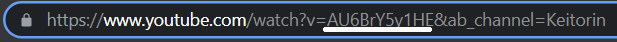
`order` - опциональный параметр, устанавливает, будем ли мы брать последние комментарии, или самые релевантные (по мнению YouTube :) )

`maxResults` задает верхнюю границу на количество комментариев, которые мы можем получить.

In [6]:
Lprint(response)

{'kind': 'youtube#commentThreadListResponse', 'etag': '1SMRDtzwB7LdJ7IQEQVIkx6GS2I', 'nextPageToken': 'QURTSl9pMmdGbV90cTVlNklEeVF1bFVpeEMwTXhuTzhqVkd3b0pMMVNGa2U5RE54VnZFWlZtMVktWkRmR1dOTmNEWXUxenJIMWNNQmUzaGVsZnl1aTdZYmRKN1o3VUF4eWR3eVFwS1lzUTBZSVpiZ0UtbC1PcHhiRktXXzFEUWtiZVN6a2E1YjVwMVpTTXlFeUpOSUZHdlY4R2V0NFFHVldrN0k5ZWlsazVSNWJoM2hrbGFhVGlqNmxYT3YyUXR0Zkt0NWViSWt1cFVYV0JhUmMzMHNLd0MwX3NYa2JqTzlzeWtzSTFaSVhWWVBSbHFyRjF2Mkhla0lNWk5RUzRhaXh1Z2Q5NHFf', 'pageInfo': {'totalResults': 15, 'resultsPerPage': 15}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'wzIIl9DuCVfkm1apxbkBUX2P5a0', 'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg', 'snippet': {'videoId': 'jI1qdTr4kco', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 's0jqo2QynUXSqQ4u8kXe_TAo73s', 'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg', 'snippet': {'videoId': 'jI1qdTr4kco', 'textDisplay': 'мне понравился момент где кот флексит в наушниках', 'textOriginal': 'мне понравился момент где кот флексит в наушниках', 'authorDisplayName': 'metarie', 

Да уж, выглядит страшно. Надо определенно что-то с этим делать. Давайте посмотрим, как это можно хотя бы красиво распечатать. Мы имеем доступ к любым данным здесь, используя оператор `[]`, так как это по факту структура из словарей:

In [17]:
response['items']

[{'kind': 'youtube#commentThread',
  'etag': 'wzIIl9DuCVfkm1apxbkBUX2P5a0',
  'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg',
  'snippet': {'videoId': 'jI1qdTr4kco',
   'topLevelComment': {'kind': 'youtube#comment',
    'etag': 's0jqo2QynUXSqQ4u8kXe_TAo73s',
    'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg',
    'snippet': {'videoId': 'jI1qdTr4kco',
     'textDisplay': 'мне понравился момент где кот флексит в наушниках',
     'textOriginal': 'мне понравился момент где кот флексит в наушниках',
     'authorDisplayName': 'metarie',
     'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj',
     'authorChannelUrl': 'http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A',
     'authorChannelId': {'value': 'UCYz4wQ1JDIACjUeKXLvla_A'},
     'canRate': True,
     'viewerRating': 'none',
     'likeCount': 4667,
     'publishedAt': '2020-03-02T14:08:19Z',
     'updatedAt': '2020-03-02T14:08:19Z'}},
   'canReply': True,
   'totalReplyCount': 102,

In [19]:
response['items'][0]['snippet']

{'videoId': 'jI1qdTr4kco',
 'topLevelComment': {'kind': 'youtube#comment',
  'etag': 's0jqo2QynUXSqQ4u8kXe_TAo73s',
  'id': 'UgxiPDZb4eQsWCK5Vst4AaABAg',
  'snippet': {'videoId': 'jI1qdTr4kco',
   'textDisplay': 'мне понравился момент где кот флексит в наушниках',
   'textOriginal': 'мне понравился момент где кот флексит в наушниках',
   'authorDisplayName': 'metarie',
   'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj',
   'authorChannelUrl': 'http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A',
   'authorChannelId': {'value': 'UCYz4wQ1JDIACjUeKXLvla_A'},
   'canRate': True,
   'viewerRating': 'none',
   'likeCount': 4667,
   'publishedAt': '2020-03-02T14:08:19Z',
   'updatedAt': '2020-03-02T14:08:19Z'}},
 'canReply': True,
 'totalReplyCount': 102,
 'isPublic': True}

In [20]:
response['items'][0]['snippet']['topLevelComment']['snippet']

{'videoId': 'jI1qdTr4kco',
 'textDisplay': 'мне понравился момент где кот флексит в наушниках',
 'textOriginal': 'мне понравился момент где кот флексит в наушниках',
 'authorDisplayName': 'metarie',
 'authorProfileImageUrl': 'https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj',
 'authorChannelUrl': 'http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A',
 'authorChannelId': {'value': 'UCYz4wQ1JDIACjUeKXLvla_A'},
 'canRate': True,
 'viewerRating': 'none',
 'likeCount': 4667,
 'publishedAt': '2020-03-02T14:08:19Z',
 'updatedAt': '2020-03-02T14:08:19Z'}

In [21]:
response['items'][0]['snippet']['topLevelComment']['snippet']['textOriginal']

'мне понравился момент где кот флексит в наушниках'

• `['items']` дает доступ ко всем элементам, которые были возвращены.

• `['items'][0]['snippet']` имеет информацию о конкретном комментарии.

• `['items'][0]['snippet']['topLevelComment']['snippet']` возвращает комментарий верхнего уровня (не ответы) и его snippet.

• `['items'][0]['snippet']['topLevelComment']['snippet']['textOriginal']` -  текст нужного комментария к оригинале - как был написан.

Так что можем представить данные так:

In [26]:
comment_cat_0 = response['items'][0]['snippet']['topLevelComment']['snippet']

print('Author:', comment_cat_0['authorDisplayName'], ', ', comment_cat_0['authorChannelUrl'])
print('Avatar picture link:', comment_cat_0['authorProfileImageUrl'])
print('Text:', comment_cat_0['textOriginal'])
print('Like count:', comment_cat_0['likeCount'])

Author: metarie ,  http://www.youtube.com/channel/UCYz4wQ1JDIACjUeKXLvla_A
Avatar picture link: https://yt3.ggpht.com/ytc/AKedOLR-s_abbysQTa9xU4Wg6fh_3B_lp1T1X6L2FH27=s48-c-k-c0x00ffffff-no-rj
Text: мне понравился момент где кот флексит в наушниках
Like count: 4667


# CREATING DATASET WITH COMMENTS

Окей, теперь глянем задачу создания датасета из комментариев под несколькими видео.

Элементы, которые добавим в качестве фич:

• текст комментария

• количество лайков

• id видео, к которому комментарий относится

• id автора

Видео возьмем такие:

https://www.youtube.com/watch?v=dQw4w9WgXcQ

https://www.youtube.com/watch?v=jI1qdTr4kco

https://www.youtube.com/watch?v=ByH9LuSILxU

https://www.youtube.com/watch?v=G1IbRujko-A

https://www.youtube.com/watch?v=9l49bfP3nso

https://www.youtube.com/watch?v=pCOb6Fykxz0

https://www.youtube.com/watch?v=HPd2hiYreyc

Я использую `urlparse` чтобы получить id видео прям из ссылки.

In [45]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
from urllib.parse import parse_qs

In [46]:
def url_get_param_val(url, param):
    parsed_url = urlparse(url)
    param_value = parse_qs(parsed_url.query)[param][0]
    return param_value

In [69]:
df = pd.DataFrame(columns=['like_count', 'related_video_id', 'author_id', 'text'])

video_links = [
    'https://www.youtube.com/watch?v=ByH9LuSILxU',
    'https://www.youtube.com/watch?v=dQw4w9WgXcQ',
    'https://www.youtube.com/watch?v=jI1qdTr4kco',
    'https://www.youtube.com/watch?v=G1IbRujko-A',
    'https://www.youtube.com/watch?v=9l49bfP3nso',
    'https://www.youtube.com/watch?v=pCOb6Fykxz0',
    'https://www.youtube.com/watch?v=HPd2hiYreyc'
]

comments_quantity = 100

for video_link in video_links:
    video_id = url_get_param_val(video_link, 'v')
     
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        order='relevance',
        maxResults=comments_quantity
    )
    
    response = request.execute()
    for item in response['items']:
        new_row = {}
        new_row['text'] = item['snippet']['topLevelComment']['snippet']['textOriginal']
        new_row['author_id'] = item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
        new_row['related_video_id'] = item['snippet']['videoId']
        new_row['like_count'] = item['snippet']['topLevelComment']['snippet']['likeCount']
        df = df.append(new_row, ignore_index=True)

In [70]:
df

,like_count,related_video_id,author_id,text
0,10,ByH9LuSILxU,UCLE0D_bL8ElmXI0hZLKx7cA,cute
1,0,ByH9LuSILxU,UC7gCJ6osxjQU1cj3D7Ok9gw,Soooooo cute 😂
2,0,ByH9LuSILxU,UCcyBKEID6XPFrdJNIiBs35w,I wanna buy a cat:(
3,2,ByH9LuSILxU,UCe_N6gvE55Sddgvp8i1Eduw,Sooooooooooooooooooooooooooooooooooo cute
4,0,ByH9LuSILxU,UCo2AhlHh597gNq5VxU-T9HA,😂🤣😅
...,...,...,...,...
691,1,HPd2hiYreyc,UCPb0pFHEJUtDBhgDtP_Gozg,Pilot: i dont wanna help an impostor\nPilot: *...
692,1559,HPd2hiYreyc,UCEU7w9Cq1WYImCEbgdgvDhQ,"Technically, he saved himself from getting kil..."
693,0,HPd2hiYreyc,UCPMCT5k3P7lFCuIMWwMku8A,"6 seconds in, the audio quality starts dropping."
694,0,HPd2hiYreyc,UCktOjKAIf3aWzhcUb8vnXDg,21st Century Humour at its finest


Бум, вот мы только что и заскрепили комментарии, это было легко и быстро. Ответом, приходящий от этого API, достаточно интуитивно понятен. Но я еще раз покажу, как эти запросы в сущности своей устроены.

У нас есть `response`, который содержить некоторую основную информацию о самом запросе, его типе (допустим youtube#commentThreadListResponse), другую базовую информацию.

А там у нас есть `response[items]`. Это список с возаращенной информацией, которую мы запрашивали. Например, комментарии.

`response[items][i]` это уже комментарий, и эта сущность имеет в себе базовую информацию о себе с "дополнительными данными", которые мы и запрашивали. Это просто `id`, `snippet`, `replies`, или любая их комбинация. 

`response[items][i][id]` содержит уникальный идентификатор.

`response[items][i][replies]` содержит в себе сущности Комментариев, которые имеют в себе всю информацию о комментариях, которые являются ответами на текущий комментарий, к которому это всё относится.

`response[items][i][snippet]` имеет основную информацию о сущности commentThread, такую как верхний комментарий, флаг, можем ли отвечать на комментарий, id видео, под которым он, и т.д.

`response[items][i][snippet][topLevelComment]` похож по структуре на `response`.

And `response[items][i][snippet][topLevelComment][snippet]` это тоже сущность Комментарий, поэтому в ней всё про этот комментарий, например `videoId`, `textDisplay`, `textOriginal` ,`authorDisplayName`, `authorProfileImageUrl`, `authorChannelUrl`, `authorChannelId`, `canRate`, `viewerRating`, `likeCount`, `publishedAt`, `updatedAt`.


Ну, и это всё, что касается структуры, а еще это конец гайда по использованию этого API в контексте скреппинга комментариев :)